# Data Mining Project

## Yonatan Golan, Ziv Chaba

In [175]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, MinMaxScaler, LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


import warnings # Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 

In [176]:
%matplotlib inline
sns.set(color_codes=True) 
sns.set(rc={'figure.figsize':(5,5)}) 

## 1. Data information:

In [177]:
train_df = pd.read_csv("./hotels_train.csv")
train_df.head()

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled
0,INN09588,1,5,Room_Type 1,half board,2,0,0,0,2,34.0,Online,0,0,0,108.4,11/28/2018,0
1,INN07691,0,3,Room_Type 1,NaN,2,0,0,0,0,365.0,NaN,0,0,0,NaN,11/03/2018,1
2,INN32192,0,2,Room_Type 4,half board,1,0,0,0,1,148.0,Online,0,0,0,137.3,05/06/2018,0
3,INN32218,1,2,Room_Type 1,NaN,2,0,0,0,0,502.0,Offline,0,0,0,127.0,9/26/2018,1
4,INN02994,1,3,Room_Type 4,half board,2,0,1,0,2,32.0,Offline,0,0,0,110.0,10/19/2017,0


In [178]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   27213 non-null  object 
 1   weekend_nights       27213 non-null  int64  
 2   week_nights          27213 non-null  int64  
 3   room_type            27213 non-null  object 
 4   board_type           19045 non-null  object 
 5   n_adults             27213 non-null  int64  
 6   n_less_12            27213 non-null  int64  
 7   n_more_12            27213 non-null  int64  
 8   booked_tour          27213 non-null  int64  
 9   n_requests           27213 non-null  int64  
 10  lead_time            26794 non-null  float64
 11  purchase_type        22366 non-null  object 
 12  n_p_cacellation      27213 non-null  int64  
 13  n_p_not_cacellation  27213 non-null  int64  
 14  repeated             27213 non-null  int64  
 15  price                23808 non-null 

In [179]:
train_df.describe(include='all')

,ID,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date,is_canceled
count,27213,27213.000000,27213.000000,27213,19045,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,26794.000000,22366,27213.000000,27213.000000,27213.000000,23808.000000,27213,27213.000000
unique,27213,NaN,NaN,7,4,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,553,NaN
top,INN09588,NaN,NaN,Room_Type 1,half board,NaN,NaN,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,10/13/2018,NaN
freq,1,NaN,NaN,21084,14591,NaN,NaN,NaN,NaN,NaN,NaN,14306,NaN,NaN,NaN,NaN,188,NaN
mean,NaN,0.812810,2.197332,NaN,NaN,1.845221,0.052989,0.053357,0.031750,0.621100,102.952377,NaN,0.021975,0.155404,0.026421,123.455494,NaN,0.327674
std,NaN,0.869317,1.403576,NaN,NaN,0.519715,0.266150,0.268688,0.175336,0.785642,103.498942,NaN,0.346697,1.728693,0.160387,35.136566,NaN,0.469374
min,NaN,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,20.000000,NaN,0.000000
25%,NaN,0.000000,1.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,21.000000,NaN,0.000000,0.000000,0.000000,100.300000,NaN,0.000000
50%,NaN,1.000000,2.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,0.000000,69.000000,NaN,0.000000,0.000000,0.000000,119.450000,NaN,0.000000
75%,NaN,2.000000,3.000000,NaN,NaN,2.000000,0.000000,0.000000,0.000000,1.000000,153.000000,NaN,0.000000,0.000000,0.000000,140.000000,NaN,1.000000


From the information above we can learn about missing values, attributes data type and unmatched data type.
- Missing values: for the attributes 'board_type', 'lead_time', 'purchase_type', and 'price'.
- Unmatched data type: for the attribute 'room_type' the data type is object and it should be a numeric for, we need to convert it.
- unique, top and freq relevent to data from object type

In [180]:
train_df['room_type'] = train_df['room_type'].str.extract('(\d+\.?\d*)', expand = True).astype(int)  #d - numeric values
train_df['room_type'].dtype

dtype('int32')

#### Split to attributes and taget

In [181]:
target =pd.DataFrame(train_df['is_canceled']) 
data = train_df.drop(['ID', 'is_canceled'], axis=1)
data

,weekend_nights,week_nights,room_type,board_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,purchase_type,n_p_cacellation,n_p_not_cacellation,repeated,price,date
0,1,5,1,half board,2,0,0,0,2,34.0,Online,0,0,0,108.4,11/28/2018
1,0,3,1,NaN,2,0,0,0,0,365.0,NaN,0,0,0,NaN,11/03/2018
2,0,2,4,half board,1,0,0,0,1,148.0,Online,0,0,0,137.3,05/06/2018
3,1,2,1,NaN,2,0,0,0,0,502.0,Offline,0,0,0,127.0,9/26/2018
4,1,3,4,half board,2,0,1,0,2,32.0,Offline,0,0,0,110.0,10/19/2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27208,1,2,1,NaN,3,0,0,0,1,106.0,NaN,0,0,0,NaN,7/18/2018
27209,0,4,1,half board,2,0,0,0,1,18.0,Online,0,0,0,113.0,2/24/2018
27210,0,2,1,NaN,2,0,0,0,0,147.0,Offline,0,0,0,105.0,4/15/2018
27211,1,0,4,half board,1,0,0,0,0,3.0,Aviation,0,0,0,130.0,5/22/2018


#### Split to nominal and numerical attributes

In [182]:
numeric_col = data.describe().columns # to get the numeric column
numeric_col

Index(['weekend_nights', 'week_nights', 'room_type', 'n_adults', 'n_less_12',
       'n_more_12', 'booked_tour', 'n_requests', 'lead_time',
       'n_p_cacellation', 'n_p_not_cacellation', 'repeated', 'price'],
      dtype='object')

In [183]:
numeric_data = data[numeric_col]
nominal_data = data.drop(numeric_col, axis=1)

## 2. Data statistics:

### Numerical data:
For numerical data we would like to know the range of values, whether there are outliers, the distribution and other statistics, so first we will draw the histograms.

#### Statistic information:
Describe function show statistic information for numerical data.

In [184]:
numeric_data.describe() 

,weekend_nights,week_nights,room_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,n_p_cacellation,n_p_not_cacellation,repeated,price
count,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,27213.000000,26794.000000,27213.000000,27213.000000,27213.000000,23808.000000
mean,0.812810,2.197332,1.712637,1.845221,0.052989,0.053357,0.031750,0.621100,102.952377,0.021975,0.155404,0.026421,123.455494
std,0.869317,1.403576,1.404446,0.519715,0.266150,0.268688,0.175336,0.785642,103.498942,0.346697,1.728693,0.160387,35.136566
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
25%,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,100.300000
50%,1.000000,2.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,0.000000,0.000000,119.450000
75%,2.000000,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,153.000000,0.000000,0.000000,0.000000,140.000000
max,7.000000,17.000000,7.000000,4.000000,6.000000,4.000000,1.000000,5.000000,532.000000,13.000000,57.000000,1.000000,560.000000


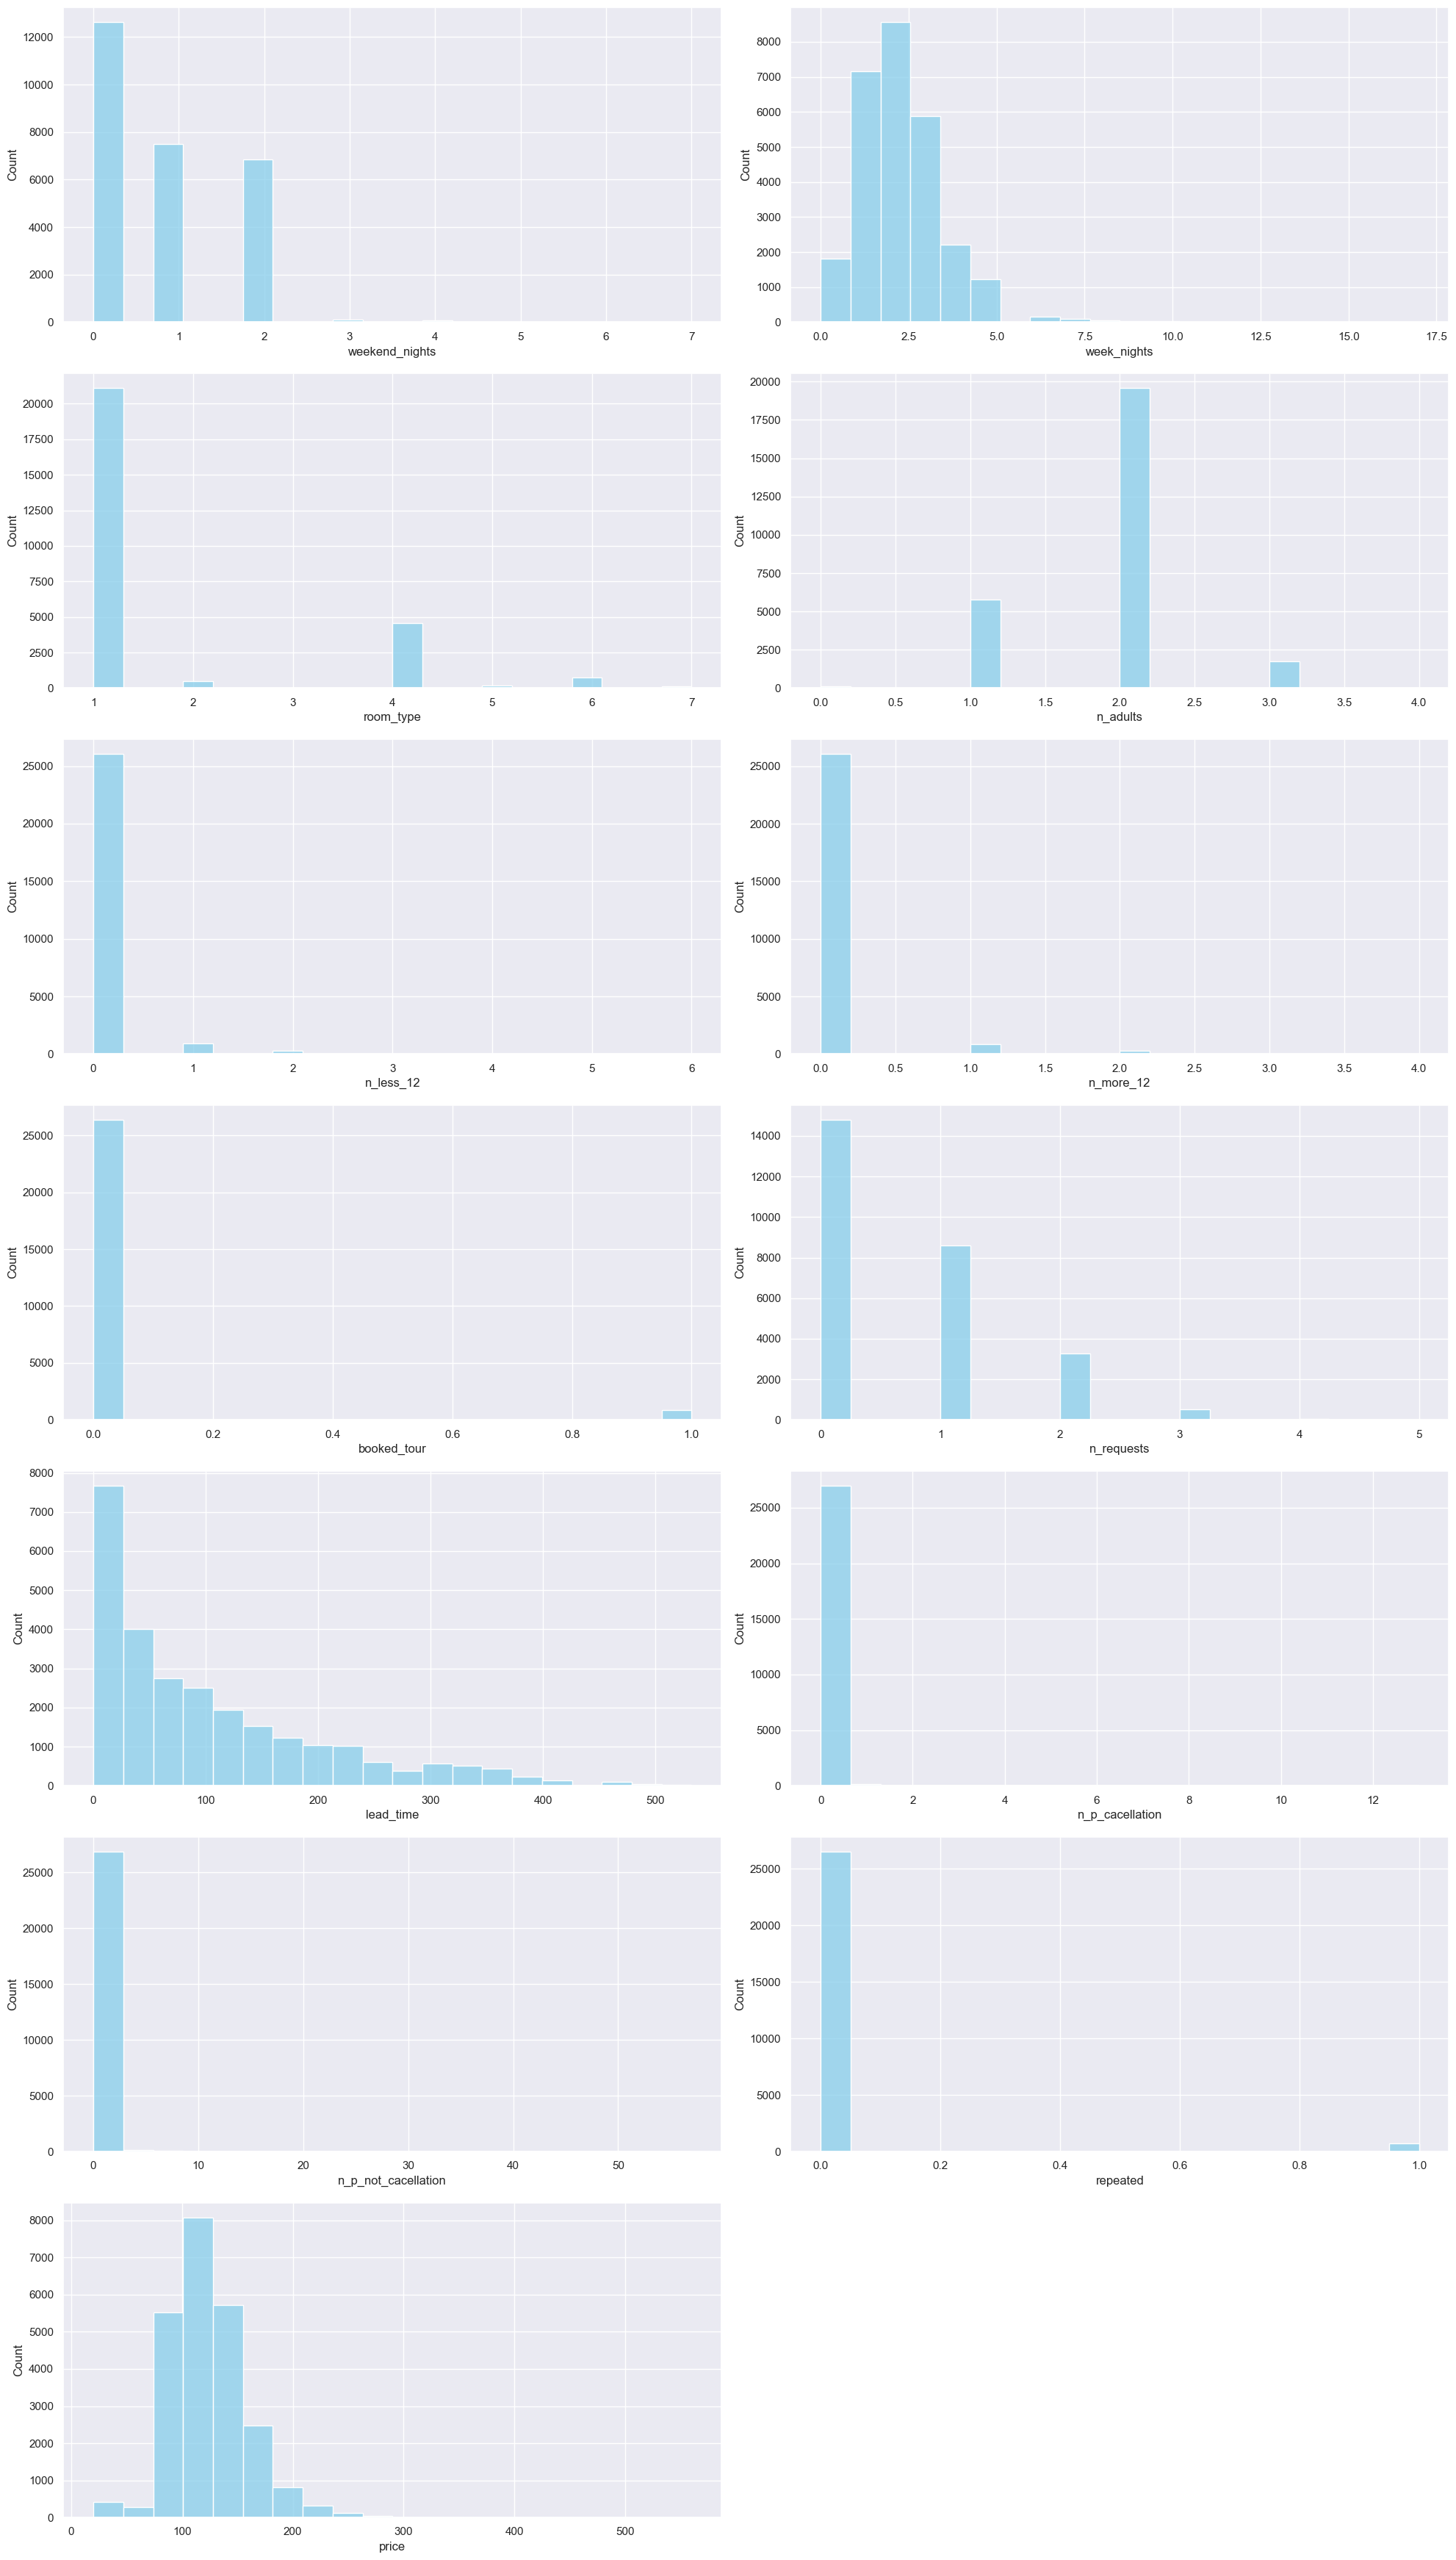

In [185]:
num_cols = 2
num_rows = (len(numeric_col) + num_cols - 1) // num_cols  # Ceiling division

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

for idx, col in enumerate(numeric_col):
    row = idx // num_cols
    col_idx = idx % num_cols
    sns.histplot(numeric_data[col], bins=20, color='skyblue', ax=axes[row, col_idx])

# Remove any empty subplots if the number of columns is not even
for i in range(len(numeric_col), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

*לגבי ההערה הזו וההערה הבאה שהוספתי צריך שתוודא אותי   ~~~ DELETE
* כרגע נראה בסדר, אדע יותר בהמשך החקירה של ה-data       ~~~ DELETE

From the histograms above it looks like 'week_nights', 'n_adults' and 'price' are normal distributed whereas the other attributes are not. Moreover, we can see that 'room_type' has only few values with importance to the order (assumption) i.e. it's a categorical ordinal attribute.

#### Skweness

In [186]:
# Calculate skewness for each column and store in a dictionary
skewness_dict = {col: numeric_data[col].skew(axis=0, skipna=True) for col in numeric_col}

# Sort the dictionary by skewness values in descending order
sorted_skewness = {k: v for k, v in sorted(skewness_dict.items(), key=lambda item: item[1], reverse=True)}

# Print the sorted skewness values
for col, skew in sorted_skewness.items():
    print(f'{col} skewness: {skew}')

n_p_cacellation skewness: 26.0690397337534
n_p_not_cacellation skewness: 19.07680621229512
repeated skewness: 5.905877062919078
n_less_12 skewness: 5.749665488234375
n_more_12 skewness: 5.569096359968911
booked_tour skewness: 5.341578775705141
room_type skewness: 1.725495758860717
week_nights skewness: 1.5422954469230514
lead_time skewness: 1.291447308852505
n_requests skewness: 1.1437446108569245
weekend_nights skewness: 0.7187888765659908
price skewness: 0.682392611272259
n_adults skewness: -0.32416096529704014


~~~ DELETE *As we can see at the graphs and from the skewness calculation,'n_less_12' and 'n_more_12' column have long right tail that indicate on asymmrtric distribution while 'price' and 'weekend_nights' are more symmetric.

#### probability

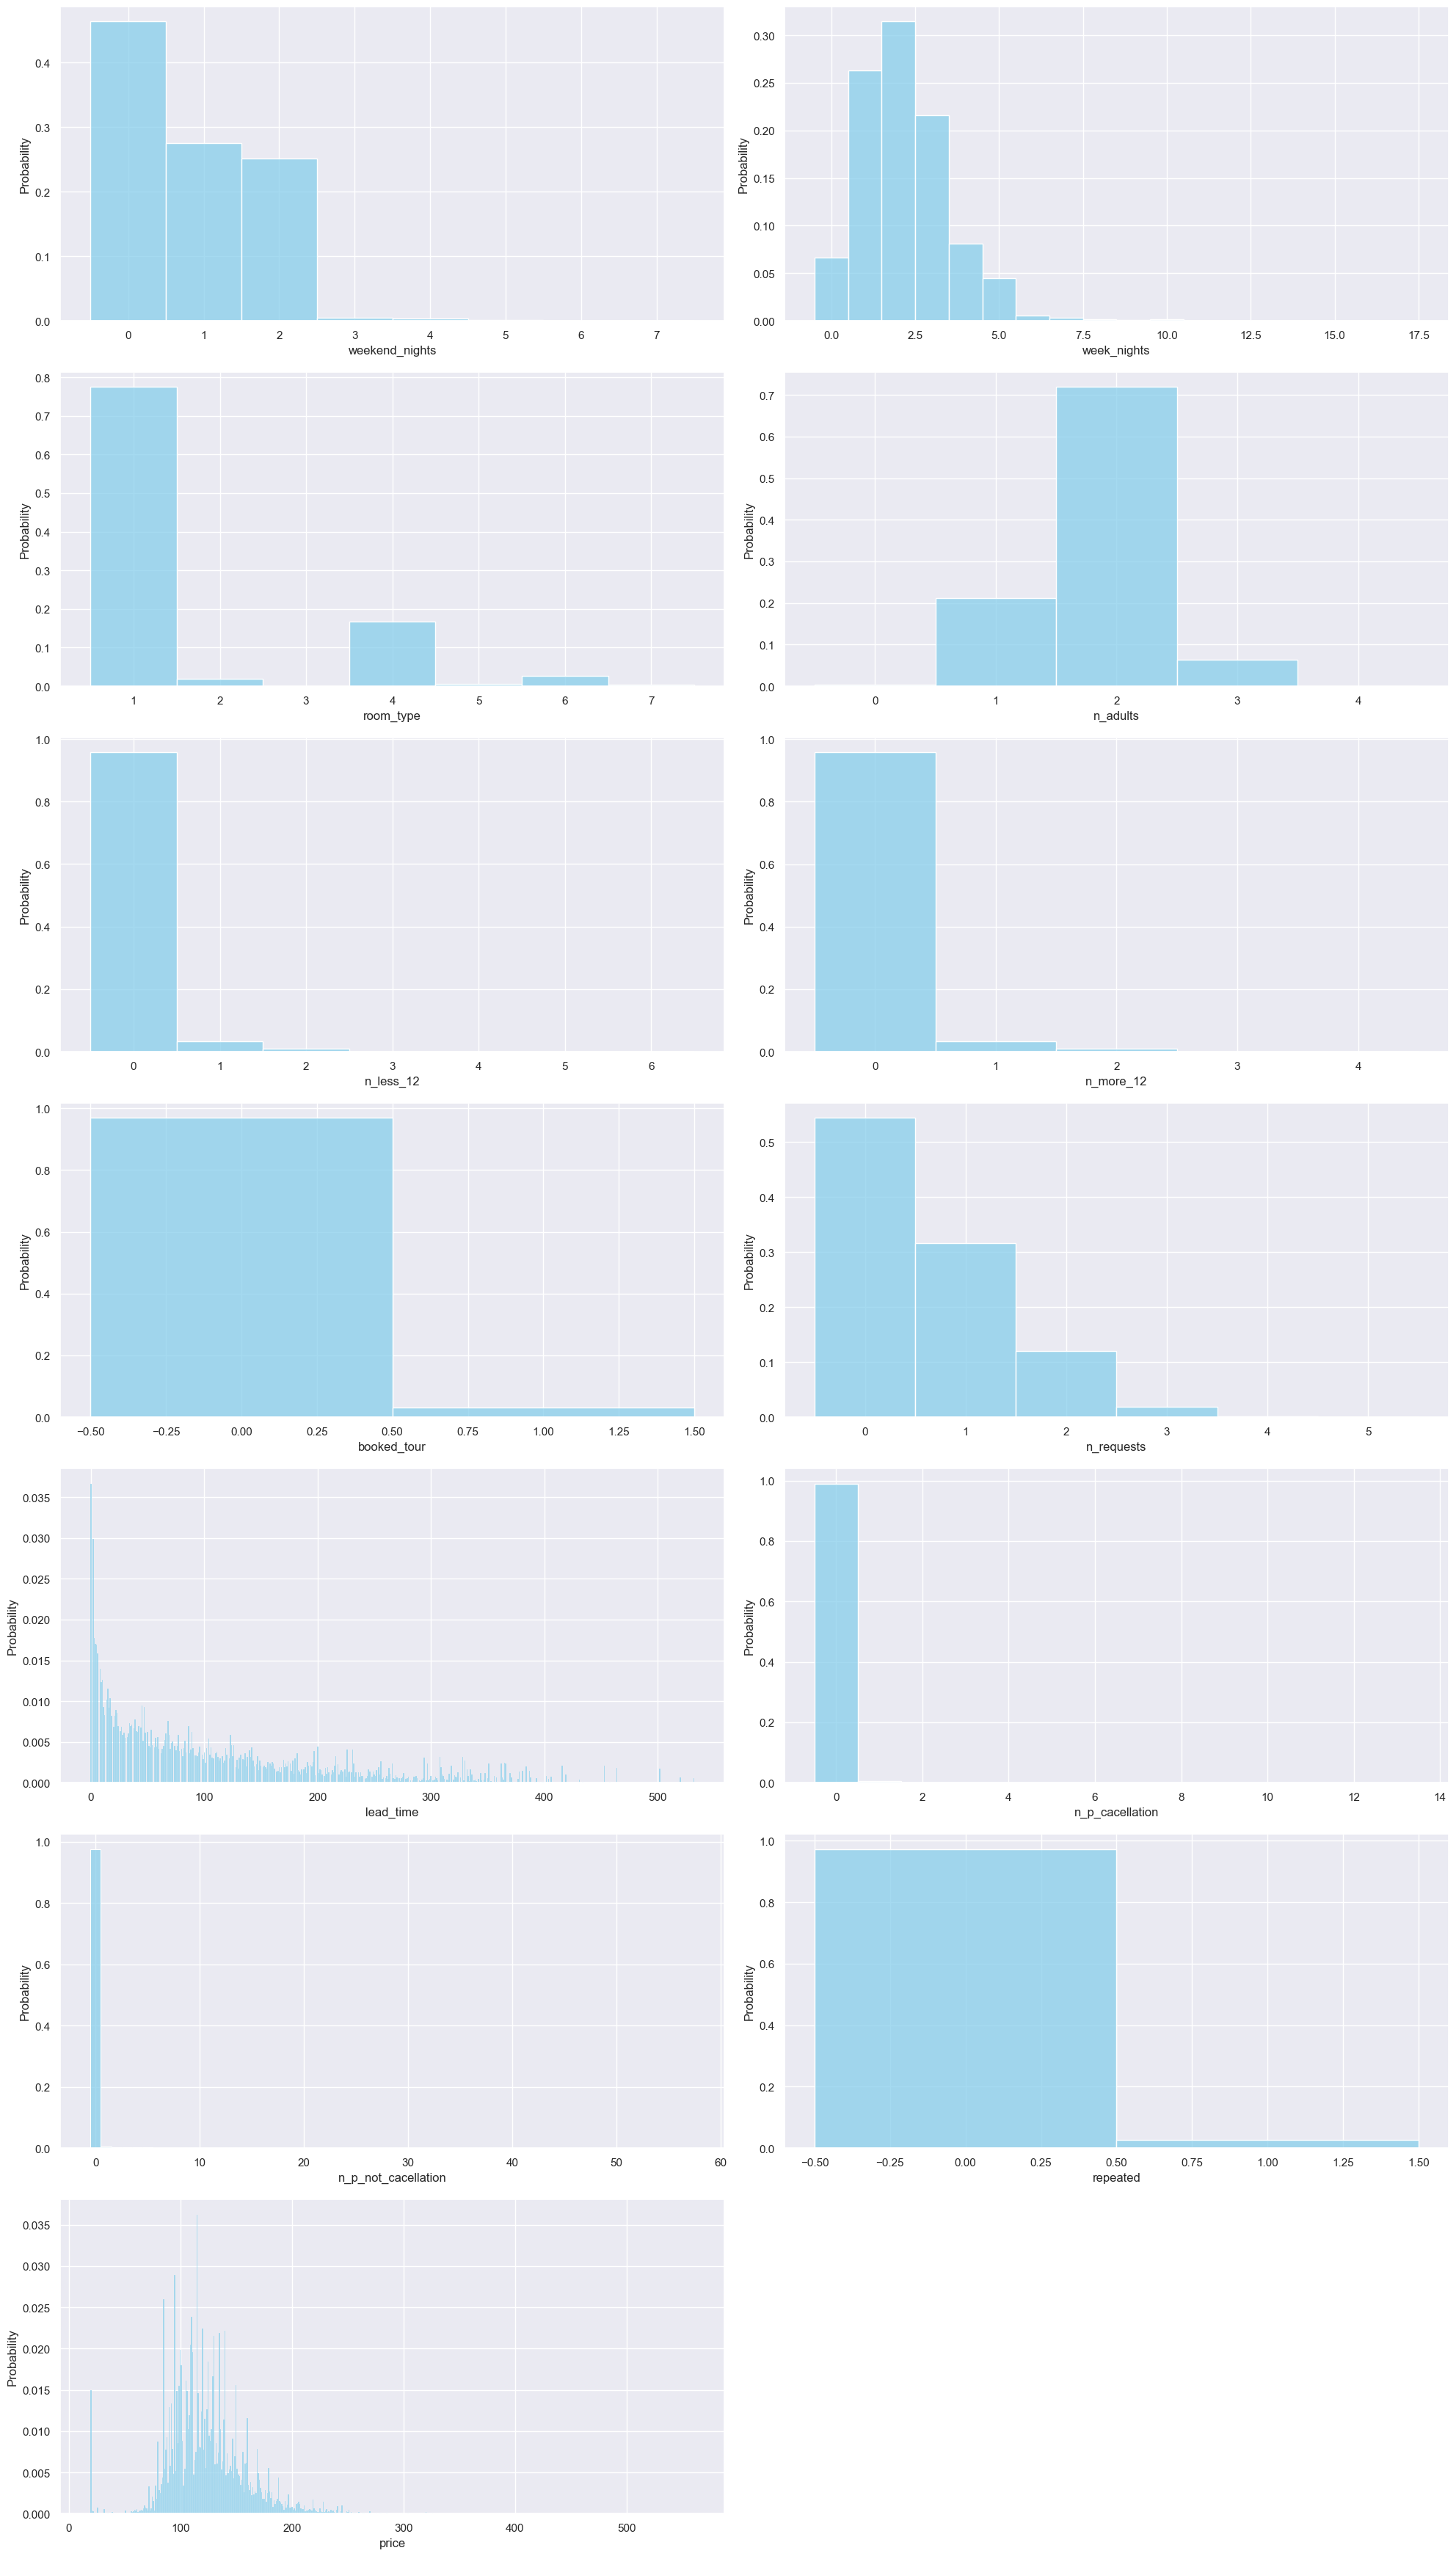

In [187]:
fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))

for idx, col in enumerate(numeric_col):
    row = idx // num_cols
    col_idx = idx % num_cols
    sns.histplot(numeric_data[col], color='skyblue', stat="probability", discrete=True, ax=axes[row, col_idx])

# Remove any empty subplots if the number of columns is not even
for i in range(len(numeric_col), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

#### Categorial attributes

In [188]:
print(numeric_data['room_type'].value_counts().sort_index())

room_type
1    21084
2      511
3        3
4     4571
5      180
6      741
7      123
Name: count, dtype: int64


<Axes: ylabel='price'>

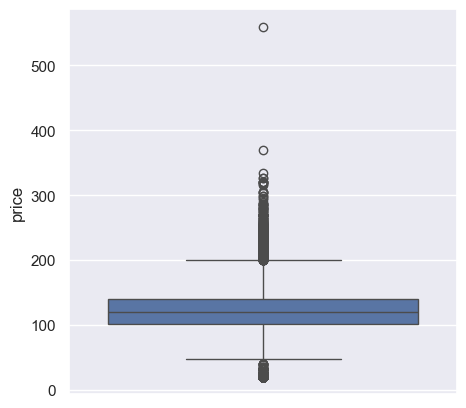

In [189]:
sns.boxplot(y="price", data=train_df)

### Nominal data:
For nominal data we would like to know how many unique values there are and the distribution.

In [190]:
nominal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27213 entries, 0 to 27212
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   board_type     19045 non-null  object
 1   purchase_type  22366 non-null  object
 2   date           27213 non-null  object
dtypes: object(3)
memory usage: 637.9+ KB


Describe function for nomiunal data show information about unique value, top value and the top value frequency.

In [191]:
describe_df = nominal_data.describe()
describe_df

,board_type,purchase_type,date
count,19045,22366,27213
unique,4,5,553
top,half board,Online,10/13/2018
freq,14591,14306,188


Adding the top value frequency in percent.

In [192]:
describe_df.loc['%freq'] = describe_df.apply(lambda x: np.round(x.loc['freq']/x.loc['count'], decimals=3))
describe_df

,board_type,purchase_type,date
count,19045,22366,27213
unique,4,5,553
top,half board,Online,10/13/2018
freq,14591,14306,188
%freq,0.766,0.64,0.007


#### Histograms
The column 'date' has too many unique values so there is no reason to look on his histogram.

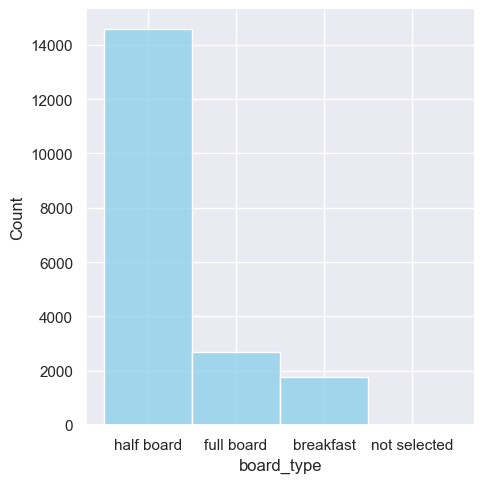

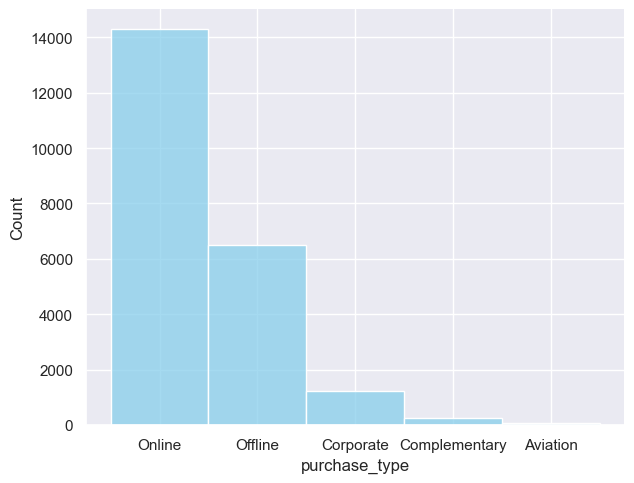

In [193]:
sns.displot(nominal_data, x='board_type', color='skyblue')
sns.displot(nominal_data, x='purchase_type',aspect=1.3, color='skyblue')

### Target

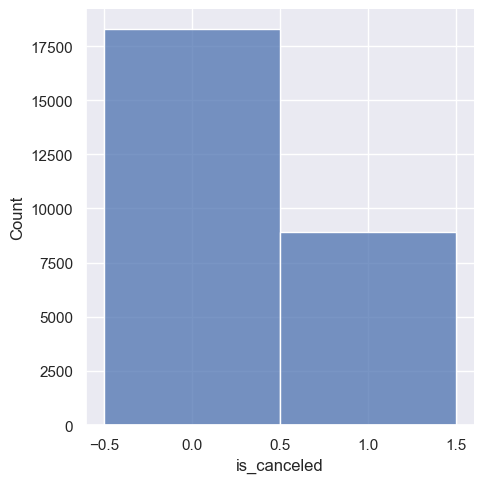

In [194]:
sns.displot(target, x='is_canceled', discrete=True)

#### Pie chart

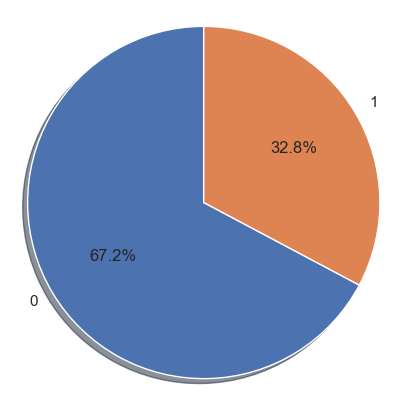

In [195]:
fig1, ax1 = plt.subplots()
ax1.pie(target['is_canceled'].value_counts(), labels=target['is_canceled'].unique(), autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal') 
plt.show()

## 3. Attributes correlations

In [196]:
corr_matrix = train_df[train_df.describe().columns].corr(method = 'pearson')  # check for correlation, more then +-0.3 there is a little bit connection
corr_matrix

,weekend_nights,week_nights,room_type,n_adults,n_less_12,n_more_12,booked_tour,n_requests,lead_time,n_p_cacellation,n_p_not_cacellation,repeated,price,is_canceled
weekend_nights,1.000000,0.172582,0.060986,0.106355,0.019048,0.020736,-0.033336,0.060688,0.045434,-0.023784,-0.029500,-0.072326,-0.000601,0.066571
week_nights,0.172582,1.000000,0.093326,0.105197,0.009291,0.020412,-0.052188,0.046046,0.149524,-0.027565,-0.048246,-0.100375,0.020085,0.093008
room_type,0.060986,0.093326,1.000000,0.270896,0.276393,0.278152,0.039589,0.145410,-0.106801,-0.006050,-0.009804,-0.023882,0.469287,0.026948
n_adults,0.106355,0.105197,0.270896,1.000000,-0.005528,-0.022964,0.009166,0.188380,0.096608,-0.046387,-0.124772,-0.199585,0.301024,0.087098
n_less_12,0.019048,0.009291,0.276393,-0.005528,1.000000,0.125932,0.036395,0.094793,-0.040479,-0.012620,-0.015822,-0.025912,0.257406,0.022208
n_more_12,0.020736,0.020412,0.278152,-0.022964,0.125932,1.000000,0.020203,0.099084,-0.033408,-0.012587,-0.017378,-0.029303,0.252388,0.023083
booked_tour,-0.033336,-0.052188,0.039589,0.009166,0.036395,0.020203,1.000000,0.091335,-0.062729,0.021167,0.068105,0.113914,0.057756,-0.086230
n_requests,0.060688,0.046046,0.145410,0.188380,0.094793,0.099084,0.091335,1.000000,-0.099829,0.000753,0.030748,-0.009791,0.179417,-0.250765
lead_time,0.045434,0.149524,-0.106801,0.096608,-0.040479,-0.033408,-0.062729,-0.099829,1.000000,-0.047808,-0.080618,-0.139704,-0.063702,0.436932
n_p_cacellation,-0.023784,-0.027565,-0.006050,-0.046387,-0.012620,-0.012587,0.021167,0.000753,-0.047808,1.000000,0.473422,0.384761,-0.062945,-0.036572


Visualization of the correlation matrix

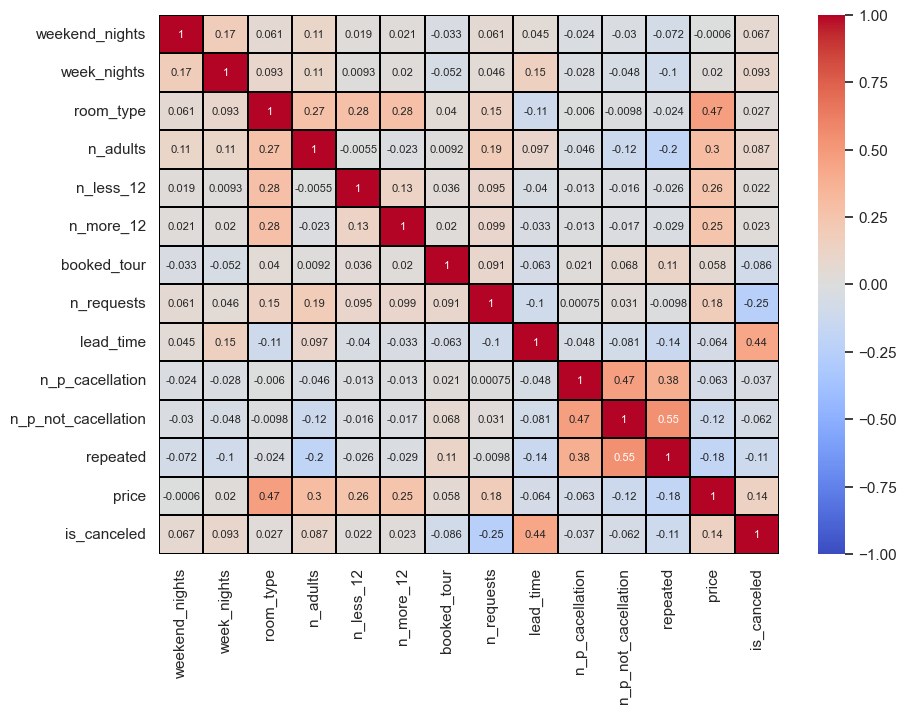

In [197]:
f, ax = plt.subplots(figsize=(10, 7))
ax = sns.heatmap(corr_matrix, annot = True, vmin=-1, vmax=1, center= 0,
            cmap= 'coolwarm', linewidths=0.2, linecolor='black', annot_kws={'size': 8})

We can see that the attribute with the strongest correlation to our target value 'is_canceled' is 'lead_time'.

Moreover we can see strong correlation between 'room_type' and 'price' which is obvious because some of the room types cost more than others. 
Other strong correlations we can see between 'n_p_cacellation' and 'n_p_not_cacellation, and between 'n_p_not_cacellation and 'repeated'(and also smaller correlation between 'repeated' and 'n_p_cacellation').

Those three attributes describe:

    • 'repeated': indicates whether the reservation is a repeat reservation
    • 'n_p_cacellation': number of previous reservations that were canceled by the customer prior to the current reservation
    • 'n_p_not_cacellation': number of previous reservations not canceled by the customer prior to the current reservation 
It's making sense those three have correlation because just if reservation is a repeat reservation there is a chance that the customer had prior reservation which might got canceled (and then increase the 'n_p_cacellation' or not and then increase the attribute 'n_p_not_cacellation').

We can see other smaller correlation between 'n_adults' and 'price' which also obvious because when you have more adults the price getting higher. 

## 4. Interesting insights from the data

As been said in the privous note - the attribute with the strongest correlation to our target value 'is_canceled' is 'lead_time'.

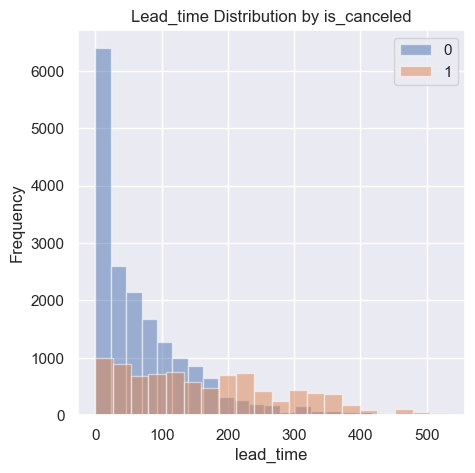

In [198]:
train_df.groupby('is_canceled')['lead_time'].plot(kind='hist', bins=20, alpha=0.5, legend=True)
plt.xlabel('lead_time')
plt.ylabel('Frequency')
plt.title('Lead_time Distribution by is_canceled')
plt.show()

'lead_time' represents the number of days between the reservation date and the arrival date.
We can see from the above plot and the correlation that when the lead time is greater - there are more chances the reservation will get canceled.



## 5. Data Cleaning

Now, we are going to investigate the given dataset, and search for problems in the data such as missing values and inconsistency.

We are going to start with handling the missing values and checking for data types.

In [199]:
# Check for missing values in the training dataset
missing_values_count = train_df.isnull().sum()
missing_values_percentage = (train_df.isnull().sum() / train_df.shape[0]) * 100

# Combine the counts and percentages into a DataFrame
missing_values_df = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage
})

# Display the columns with missing values
missing_values_df = missing_values_df[missing_values_df['Missing Values Count'] > 0]

print(missing_values_df)



               Missing Values Count  Missing Values Percentage
board_type                     8168                  30.015066
lead_time                       419                   1.539705
purchase_type                  4847                  17.811340
price                          3405                  12.512402


We can see that in the training set there are missing values in the attributes - board_type, lead_time, purchase_type and price.
We can determine that there is a significant missing values in the attributes - board_type purchase_type and price, and the most significant is in the board_type attribute.
We will fill missing values for categorical variables with the mode, and Fill missing values for numerical variables with the median.

For class  1  the median is  114.5
For class  1  the mean is  115.88661138211383
and the number of missing values is  2634 out of  21084 rows
For class  2  the median is  105.85499999999999
For class  2  the mean is  108.92675438596491
and the number of missing values is  55 out of  511 rows
For class  3  the median is  100.75
For class  3  the mean is  111.91666666666667
and the number of missing values is  0 out of  3 rows
For class  4  the median is  147.65
For class  4  the mean is  145.5463647767185
and the number of missing values is  585 out of  4571 rows
For class  5  the median is  139.4
For class  5  the mean is  143.66717948717948
and the number of missing values is  24 out of  180 rows
For class  6  the median is  200.2
For class  6  the mean is  200.2548049921997
and the number of missing values is  100 out of  741 rows
For class  7  the median is  212.245
For class  7  the mean is  174.05896551724138
and the number of missing values is  7 out of  123 rows
There are no mis

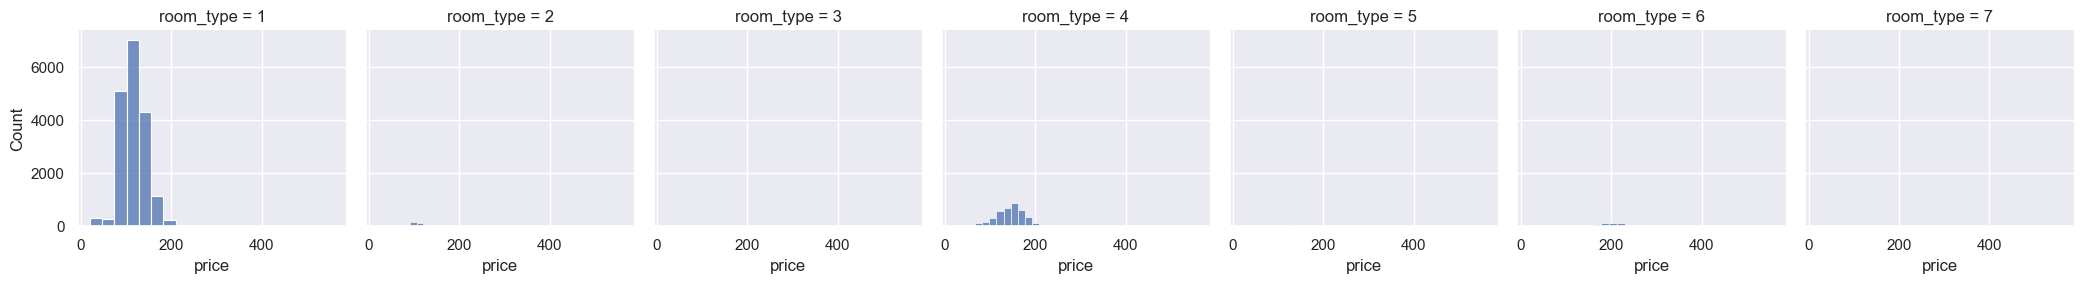

In [200]:
# Fill missing values for categorical variables with the mode   ----> Check this
train_df['board_type'].fillna(train_df['board_type'].mode()[0], inplace=True)
train_df['purchase_type'].fillna(train_df['purchase_type'].mode()[0], inplace=True)

# Fill missing values for numerical variables with the median ---> Check this
train_df['lead_time'].fillna(train_df['lead_time'].median(), inplace=True)


# Fill missing values of 'price' by its correlation with 'room_type' - by the correlation matrix we see that the correlation is 0.47
# therefore it is an option to divide into groups, conforming to this attribute, and in each group we will complete the value according to the
# statistics.
g = sns.FacetGrid(train_df, col="room_type")
g.map_dataframe(sns.histplot, x="price", bins=20)

for i in sorted(train_df['room_type'].unique()):
    print('For class ', i, ' the median is ', train_df.loc[train_df['room_type']==i,
        'price'].median())
    print('For class ', i, ' the mean is ', train_df.loc[train_df['room_type']==i,
        'price'].mean())
    print('and the number of missing values is ',
        train_df.loc[train_df['room_type']==i , 'price'].isnull().sum(),
        'out of ',(train_df['room_type']==i).sum(), 'rows')
    

# We see that we got that class 3 of 'room_type', there are any missing values for 'price',
# therefore we will skip it. The rest will be filled by the probability function of every class.

# Calculate mean and standard deviation for each room_type:
mu_sigma = {}
for room_type in sorted(train_df['room_type'].unique()):
    mu = train_df.loc[train_df['room_type'] == room_type, 'price'].mean()
    sigma = train_df.loc[train_df['room_type'] == room_type, 'price'].std()
    mu_sigma[room_type] = (mu, sigma)

# Define a function to fill missing 'price' values based on 'room_type'
def fill_missing_price(row):
    if pd.isna(row['price']):
        room_type = row['room_type']
        if room_type in mu_sigma:
            mu, sigma = mu_sigma[room_type]
            return np.random.normal(mu, sigma)
    else:
        return row['price']

# Apply the function to the DataFrame
train_df['price'] = train_df.apply(fill_missing_price, axis=1)


# Verify if missing values have been handled
missing_values = train_df.isnull().sum()

if missing_values.any():
    print("There are missing values in the following columns:")
    print(missing_values[missing_values > 0])
else:
    print("There are no missing values in the DataFrame now.")

We see that now we complete the missing values, with reliable values.

## 6.  Add / Delete Attributes

We can notice that the 'ID' attribute is just a generic string which give us no information, so we can delete this attribute.

In [201]:
# Delete the ID attribute:
train_df.drop(columns=['ID'], inplace=True)
print(train_df.columns)

Index(['weekend_nights', 'week_nights', 'room_type', 'board_type', 'n_adults',
       'n_less_12', 'n_more_12', 'booked_tour', 'n_requests', 'lead_time',
       'purchase_type', 'n_p_cacellation', 'n_p_not_cacellation', 'repeated',
       'price', 'date', 'is_canceled'],
      dtype='object')


Moreover, in order to analyze the data regards to the 'date' attribute, we will split the 'date' attribute into three new nominal categorical attributes- 'day_date', 'month_date', 'year_date'.
We see, for example, impossible date, such as 2018-2-29, which is invalid because 29 on February can be only in leap years, and 2018 is not a leap year. Such dates are handled as NaT values, and we drop all the  raws with NaT value, since there are not many of them and because it is almost impossible to fix them correctly. 

In [202]:
# Convert 'date' column to datetime format with flexible parsing and handle invalid dates
train_df['date'] = pd.to_datetime(train_df['date'], errors='coerce', infer_datetime_format=True)

# Handle NaT values (e.g., drop rows with NaT values)
train_df = train_df.dropna(subset=['date'])

# Extract components into new columns
train_df['year'] = train_df['date'].dt.year.astype(int).astype(str)
train_df['month'] = train_df['date'].dt.month.astype(int).astype(str)
train_df['day'] = train_df['date'].dt.day.astype(int).astype(str)

# Drop the original 'date' column
train_df.drop(columns=['date'], inplace=True)

print("DataFrame with extracted components:")
print(train_df.columns)

DataFrame with extracted components:
Index(['weekend_nights', 'week_nights', 'room_type', 'board_type', 'n_adults',
       'n_less_12', 'n_more_12', 'booked_tour', 'n_requests', 'lead_time',
       'purchase_type', 'n_p_cacellation', 'n_p_not_cacellation', 'repeated',
       'price', 'is_canceled', 'year', 'month', 'day'],
      dtype='object')


Now, we will check the data types and address inconsistencies.

In [203]:
# Check data types of the columns
data_types = train_df.dtypes
print(data_types)

# Check for mixed data types in each column
have_dup = 0
for column in train_df.columns:
    unique_types = train_df[column].apply(type).nunique()
    if unique_types > 1:
        have_dup = 1
        print(f'Column {column} has mixed data types')
if have_dup == 0:
    print("There are any duplicate columns.")

weekend_nights           int64
week_nights              int64
room_type                int32
board_type              object
n_adults                 int64
n_less_12                int64
n_more_12                int64
booked_tour              int64
n_requests               int64
lead_time              float64
purchase_type           object
n_p_cacellation          int64
n_p_not_cacellation      int64
repeated                 int64
price                  float64
is_canceled              int64
year                    object
month                   object
day                     object
dtype: object
There are any duplicate columns.


We can see that we don't have any mixed data types for every given attribute.

Columns with strings are stored with the 'object' type. 
We can see that there are some inconsistencies at the board_type, purchase_type, date attributes.
We can see that we don't have mixed data types. We also don't have any duplicate raws.


## 7. Data transformation

Now we will do normalization to numierical attributes using  and discretization.

In [204]:
# Identify numerical, binary, and categorical columns
numerical_cols = train_df.select_dtypes(include=['int32','int64', 'float64']).columns
categorical_cols = [x for x in train_df.columns if x not in numerical_cols] # ['board_type', 'purchase_type', 'year_date', 'month_date', 'day_date']

# Normalization (Min-Max Scaling) for numerical attributes
scaler = MinMaxScaler()
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])

# Initialize LabelEncoder for categorical attributes
le = LabelEncoder()

# Apply LabelEncoder to each component
train_df['year'] = le.fit_transform(train_df['year'])
train_df['month'] = le.fit_transform(train_df['month'])
train_df['day'] = le.fit_transform(train_df['day'])

print(train_df)


       weekend_nights  week_nights  room_type  board_type  n_adults  \
0            0.142857     0.294118        0.0  half board      0.50   
1            0.000000     0.176471        0.0  half board      0.50   
2            0.000000     0.117647        0.5  half board      0.25   
3            0.142857     0.117647        0.0  half board      0.50   
4            0.142857     0.176471        0.5  half board      0.50   
...               ...          ...        ...         ...       ...   
27208        0.142857     0.117647        0.0  half board      0.75   
27209        0.000000     0.235294        0.0  half board      0.50   
27210        0.000000     0.117647        0.0  half board      0.50   
27211        0.142857     0.000000        0.5  half board      0.25   
27212        0.000000     0.117647        0.0   breakfast      0.50   

       n_less_12  n_more_12  booked_tour  n_requests  lead_time purchase_type  \
0            0.0       0.00          0.0         0.4   0.063910   